In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
rfsn = pd.read_csv("/Users/quentinveyrat/Desktop/NicolasCSV/RFSN_1686575814_ID_Nicolas_cam_4.csv", header=None)
# rfsn = pd.read_csv("/Users/quentinveyrat/Desktop/RFSN_1684482569_ID_julie_cam_4 - RFSN_1684482569_ID_julie_cam_4.csv.csv", header=None)

In [3]:
rfsn

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.5939,0.6451,-0.0142,0.6003,0.6364,-0.0064,0.6004,0.6348,-0.0064,0.6003,...,0.1923,0.3401,0.7163,0.0121,0.3809,0.7398,0.1661,0.3685,0.7655,-0.0325
1,0.5950,0.6457,-0.0032,0.6010,0.6369,0.0042,0.6009,0.6351,0.0041,0.6006,...,0.1872,0.3405,0.7188,-0.0062,0.3782,0.7502,0.1611,0.3688,0.7719,-0.0513
2,0.5954,0.6437,-0.0118,0.6015,0.6349,-0.0042,0.6013,0.6333,-0.0042,0.6011,...,0.2021,0.3398,0.7150,-0.0045,0.3799,0.7469,0.1760,0.3659,0.7709,-0.0517
3,0.5950,0.6437,-0.0020,0.6012,0.6354,0.0058,0.6011,0.6338,0.0057,0.6010,...,0.2025,0.3402,0.7179,-0.0174,0.3803,0.7460,0.1776,0.3688,0.7721,-0.0643
4,0.5948,0.6436,-0.0031,0.6011,0.6355,0.0046,0.6010,0.6339,0.0046,0.6008,...,0.1975,0.3404,0.7181,-0.0198,0.3794,0.7483,0.1709,0.3685,0.7718,-0.0676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.5652,0.6521,-0.0201,0.5714,0.6452,-0.0118,0.5717,0.6437,-0.0119,0.5720,...,0.1921,0.3322,0.7332,-0.0030,0.3768,0.7554,0.1598,0.3641,0.7739,-0.0578
469,0.5658,0.6515,-0.0165,0.5719,0.6450,-0.0090,0.5722,0.6436,-0.0090,0.5726,...,0.1967,0.3335,0.7258,0.0070,0.3767,0.7529,0.1682,0.3647,0.7695,-0.0437
470,0.5658,0.6514,-0.0162,0.5721,0.6449,-0.0086,0.5724,0.6435,-0.0086,0.5727,...,0.1892,0.3328,0.7302,-0.0024,0.3761,0.7549,0.1589,0.3643,0.7707,-0.0550
471,0.5659,0.6527,-0.0277,0.5722,0.6459,-0.0195,0.5725,0.6444,-0.0196,0.5728,...,0.2001,0.3320,0.7293,0.0070,0.3773,0.7516,0.1680,0.3630,0.7703,-0.0481


In [4]:
landmark_12 = rfsn.iloc[:, 36:39]
landmark_14 = rfsn.iloc[:, 42:45]
landmark_24 = rfsn.iloc[:, 72:75]
landmark_26 = rfsn.iloc[:, 78:81]
min_len = min(len(landmark_12.index), len(landmark_14.index), len(landmark_24.index), len(landmark_26.index))
print("Longueur minimum des données :", min_len)

Longueur minimum des données : 473


In [5]:
A = np.array([landmark_26.iloc[:,0],landmark_26.iloc[:,1]]).T
B = np.array([landmark_24.iloc[:,0],landmark_24.iloc[:,1]]).T
C = np.array([landmark_12.iloc[:,0],landmark_12.iloc[:,1]]).T
D = np.array([landmark_14.iloc[:,0],landmark_14.iloc[:,1]]).T

In [6]:
def calculate_angle(a,b,c) -> float:
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

In [7]:
angles_ABC = []
angles_BCD = []

for i in range (0,min_len):
    angle_ABC = calculate_angle(A[i], B[i], C[i])
    angle_BCD = calculate_angle(B[i], C[i], D[i])

    angles_ABC.append(angle_ABC)
    angles_BCD.append(angle_BCD)

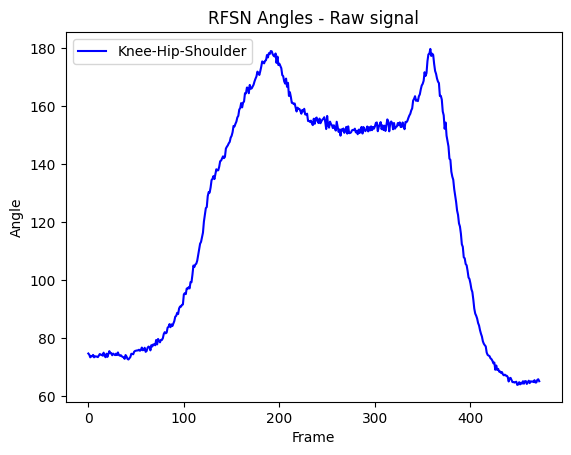

In [14]:
plt.plot(angles_ABC, color="blue", label="Knee-Hip-Shoulder")
# plt.plot(angles_BCD, color="red", label="Hip-Shoulder-Elbow")
# plt.plot([0,min_len],[180,180], color="gray")
plt.title("RFSN Angles - Raw signal");
plt.xlabel("Frame");
plt.ylabel("Angle");
plt.legend(loc="upper left");